In [155]:
#İmport all required libaries first.
import pandas as pd
import numpy as np
import matplotlib as plot
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [156]:
df = pd.read_csv('StatswithFMValues.txt',sep=";" )
df

,Unnamed: 0,PlayerName,Name,Position,Age,Min,Goals,GoalsPer90,Asists,AsistsPer90,...,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,Value,Value2,NetValue,logValue
0,0,Aaron Connolly,Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,...,24,1.13,61.0,6.0,1.0,Forward,9.0,M,9.0,2.197225
1,1,Aaron Cresswell,Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,...,31,0.97,26.0,16.0,2.0,Defender,10.0,M,10.0,2.302585
2,2,Aaron Leya Iseka,Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,...,22,0.27,39.0,7.0,0.0,Forward,600.0,K,0.6,-0.510826
3,3,Aaron Ramsdale,Aaron Ramsdale,GK,21.0,3330,0,0.00,1,0.03,...,37,0.92,0.0,0.0,0.0,Goalkeeper,20.0,M,20.0,2.995732
4,4,Aaron Ramsey,Aaron Ramsey,MF,28.0,1051,3,0.26,1,0.09,...,24,2.25,61.0,16.0,0.0,Midfielder,20.0,M,20.0,2.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,1440,Ángel Montoro,Ángel Montoro,MF,31.0,973,2,0.18,5,0.46,...,15,1.60,13.0,6.0,2.0,Midfielder,2.0,M,2.0,0.693147
1441,1441,Éder Militão,Éder Militão,DF,21.0,1022,0,0.00,0,0.00,...,15,2.33,4.0,1.0,0.0,Defender,20.0,M,20.0,2.995732
1442,1442,Édgar Méndez,Édgar Méndez,MF,29.0,864,1,0.10,0,0.00,...,16,0.94,17.0,12.0,1.0,Midfielder,6.0,M,6.0,1.791759
1443,1443,Óscar Plano,Óscar Plano,MF,28.0,2505,4,0.14,2,0.07,...,36,1.17,53.0,11.0,1.0,Midfielder,2.0,M,2.0,0.693147


In [157]:
df = df.loc[:,['Name','Value']]
df.columns = ['Name', 'GooglePopularity']
df['GooglePopularity'] = 0
df.head()

,Name,GooglePopularity
0,Aaron Connolly,0
1,Aaron Cresswell,0
2,Aaron Leya Iseka,0
3,Aaron Ramsdale,0
4,Aaron Ramsey,0


In [108]:
df['Name'][23]

'Adrien Tameze'

In [158]:
url_head = 'https://www.google.com/search?source=hp&ei=ZGDxX8LYJY2UsAei1YCYDw&q='
#let's first try if google let us web scraping  ?

In [159]:
url = url_head + '"'+ df['Name'][1] + '"'
print(url)
response = requests.get(url)
response.status_code

https://www.google.com/search?source=hp&ei=ZGDxX8LYJY2UsAei1YCYDw&q="Aaron Cresswell"


200

Ok. It's working. Now let's write a loop and collect google result count for each player! 
Messi Google Results = data/messi google.png

In [160]:
from fake_useragent import UserAgent
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

url = url_head + '"' + 'Lionel+Messi'+ '"' 
response = requests.get(url)
soup = BeautifulSoup(response.text,"html")
#google result count address -> /html/body/div[7]/div[2]/div[7]/div/div/div/div/div/text() 


In [ ]:
for index, row in df.iterrows():
    # For google search we need + instead of space. 
    # quotes tells google to search for the whole phrase
    # print(row[0].replace(' ','+')) 
    url = url_head + '"' + row[0]+ '"' 
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"lxml")
    

We need selenium, because page is dynamic ! 

In [148]:
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "C:\\Program Files\Google\Chrome\Application\chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver


In [149]:
url = url_head + '"' + 'Lionel+Messi'+ '"' 

In [150]:
driver = webdriver.Chrome(chromedriver)
driver.get(url)

In [119]:
driver.page_source[:1000]

'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="tr"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>"Lionel Messi" - Google\'da Ara</title><meta content="AsgywWD3h9MShqHZ7qB19BggxUmXBsptYIq1Vj0j8zbG6fcNs9JDqEiFv5YY6CFUX0xE3dQgf8OLXuCne3UlSgsAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjEwNDczMDUwLCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.GhYSaDTWhs4.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_CcmyUNBPTBtz4hsH0C6OHKqodVQ/cb=gapi.loaded_0" nonce="PQNn18Ae8qhhMHqGnZHTng==" async=""></script><script nonce="PQNn18Ae8qhhMHqGnZHTng==">(function(){window.google={kEI:\'wsXxX_mgDsSGwPAPyomZmAo\',kEXPI:\'31\',kBL:\'ZWEf\'};google.sn=\'web\';google.kHL=\'tr\';})();(function(){\ngoogle.lc=[];google.li=0;google.getEI=func

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="tr"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><meta content="origin" name="referrer"/><title>"Lionel Messi" - Google'da Ara</title><meta content="AsgywWD3h9MShqHZ7qB19BggxUmXBsptYIq1Vj0j8zbG6fcNs9JDqEiFv5YY6CFUX0xE3dQgf8OLXuCne3UlSgsAAABieyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IlRydXN0VG9rZW5zIiwiZXhwaXJ5IjoxNjEwNDczMDUwLCJpc1N1YmRvbWFpbiI6dHJ1ZX0=" http-equiv="origin-trial"/><script async="" nonce="DMf+4DV/YgreIKt0jAk3YQ==" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.GhYSaDTWhs4.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_CcmyUNBPTBtz4hsH0C6OHKqodVQ/cb=gapi.loaded_0"></script><script nonce="DMf+4DV/YgreIKt0jAk3YQ==">(function(){window.google={kEI:'i7b0X7ScOpr7sAejk4PgDQ',kEXPI:'31',kBL:'ZWEf'};google.sn='web';google.kHL='tr';})();(function(){
google.lc=[];google.li=0;google.getEI=function(a){for
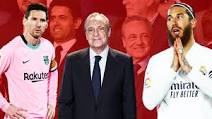
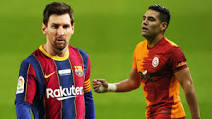
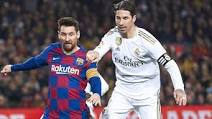
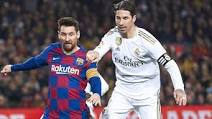
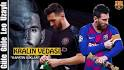
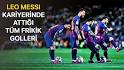
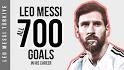
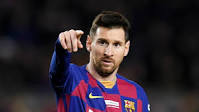
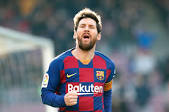
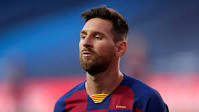
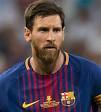
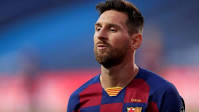
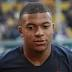
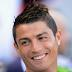
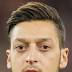
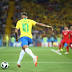
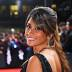
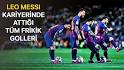
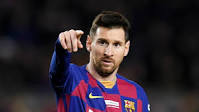
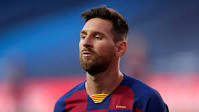
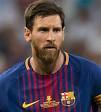
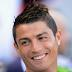
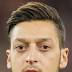
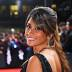
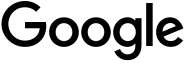

In [151]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
soup

In [152]:
soup.find('div', id='result-stats').text    

'Yaklaşık 103.000.000 sonuç bulundu (0,51 saniye)\xa0'

In [153]:
int(soup.find('div', id='result-stats').text.split(' ')[1].replace('.',''))

103000000

In [147]:
url_head = 'https://www.google.com/search?q='
for index, row in df.iterrows():
    url = url_head + '"' + row[0].replace(' ','+') + '"'  
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    df.iloc[index,1] = int(soup.find('div', id='result-stats').text.split(' ')[1].replace('.',''))
    driver.close()


WebDriverException: Message: chrome not reachable
  (Session info: chrome=87.0.4280.88)


great ! now let's write a loop again and fetch for all players !  
But i wait randomly before fetching next players data. Let's hope google will not ban us. 

In [ ]:
url_head = 'https://www.google.com/search?q='
for index, row in df.iterrows():
    # For google search we need + instead of space. 
    # quotes tells google to search for the whole phrase
    # print(row[0].replace(' ','+')) 
    url = url_head + '"' + row[0].replace(' ','+') + '"'  
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    #print(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    df.iloc[index,1] = int(soup.find('div', id='result-stats').text.split(' ')[1].replace('.',''))
    driver.close()
   
df

In [145]:
soup.find('div', id='result-stats').text    

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
int(soup.find('div', id='result-stats').text.split(' ')[1].replace('.',''))

In [144]:
df.head(3)

,Name,GooglePopularity
0,Aaron Connolly,0
1,Aaron Cresswell,0
2,Aaron Leya Iseka,0


In [125]:
url_head = 'https://www.google.com/search?q='
for index, row in df.iterrows():
    url = url_head + '"' + row[0].replace(' ','+') + '"'  
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    df.iloc[index,1] = int(soup.find('div', id='result-stats').text.split(' ')[1].replace('.',''))
    driver.close()
df

AttributeError: 'NoneType' object has no attribute 'text'

In [131]:
df.head(83)

,Name,GooglePopularity
0,Aaron Connolly,271000
1,Aaron Cresswell,388000
2,Aaron Leya Iseka,99800
3,Aaron Ramsdale,307000
4,Aaron Ramsey,2660000
...,...,...
78,Amine Gouiri,287000
79,Amine Harit,374000
80,Amir Abrashi,0
81,Amir Rrahmani,0


Selenium fails for google. let's try bing

In [93]:
url_head = 'https://www.bing.com/search?q='
url = url_head + '"' + 'Lionel+Messi'+ '"' 
driver = webdriver.Chrome(chromedriver)
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')


In [98]:
soup.find('div', id='b_tween').text 
#<div id="b_content"><main aria-label="Search Results"><div id="b_tween"><span class="sb_count">7.000.000 results</span>

'7.000.000 resultsDate Language Region '

7000000

In [ ]:
#lets scrap bing ! 

In [100]:
url_head = 'https://www.bing.com/search?q='
for index, row in df.iterrows():
    # For google search we need + instead of space. 
    # quotes tells google to search for the whole phrase
    # print(row[0].replace(' ','+')) 
    url = url_head + '"' + row[0].replace(' ','+') + '"'  
    driver = webdriver.Chrome(chromedriver)
    driver.get(url)
    #print(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    df.iloc[index,1] = int(soup.find('div', id='b_tween').text.split(' ')[0].replace('.',''))
    driver.close()
df

AttributeError: 'NoneType' object has no attribute 'text'

Fail again. i guess it 's harder than i thought to scrap google or bing.. 
As seen below, bing block my searchs at 55th search.. 

In [104]:
df[df['GooglePopularity']>0]

,Name,GooglePopularity
0,Aaron Connolly,159000
1,Aaron Cresswell,195000
2,Aaron Leya Iseka,67300
3,Aaron Ramsdale,178000
4,Aaron Ramsey,760000
5,Aaron Wan-Bissaka,645000
6,Aarón Escandell,23300
7,Aarón Martín,80800
8,Abdou Diallo,271000
9,Abdoulaye Bamba,30600
